Dataset: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
from scipy.stats import shapiro, f_oneway

In [2]:
# Load the dataset
data = pd.read_csv("CC GENERAL.csv")

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# Handle missing values
data["CUST_ID"] = data["CUST_ID"].str[1:].astype(int)
data.fillna(data.mean(), inplace=True)

In [5]:
# Feature scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.select_dtypes(include=np.number))

Statistical Methods applied

In [6]:
# Function 1: Descriptive Statistics
def descriptive_statistics():
    desc_stats = data.describe().T
    desc_stats['skewness'] = data.skew()
    desc_stats['kurtosis'] = data.kurtosis()
    print("Descriptive Statistics with Skewness and Kurtosis:")
    print(desc_stats)

descriptive_statistics()

Descriptive Statistics with Skewness and Kurtosis:
                                   count          mean          std  \
CUST_ID                           8950.0  14600.040670  2651.305875   
BALANCE                           8950.0   1564.474828  2081.531879   
BALANCE_FREQUENCY                 8950.0      0.877271     0.236904   
PURCHASES                         8950.0   1003.204834  2136.634782   
ONEOFF_PURCHASES                  8950.0    592.437371  1659.887917   
INSTALLMENTS_PURCHASES            8950.0    411.067645   904.338115   
CASH_ADVANCE                      8950.0    978.871112  2097.163877   
PURCHASES_FREQUENCY               8950.0      0.490351     0.401371   
ONEOFF_PURCHASES_FREQUENCY        8950.0      0.202458     0.298336   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0      0.364437     0.397448   
CASH_ADVANCE_FREQUENCY            8950.0      0.135144     0.200121   
CASH_ADVANCE_TRX                  8950.0      3.248827     6.824647   
PURCHASES_TRX             

In [7]:
# Function 2: Outlier Detection using Z-Score
def detect_outliers():
    z_scores = np.abs(stats.zscore(data.select_dtypes(include=np.number)))
    outliers = (z_scores > 3).sum(axis=0)

    print("Number of Outliers per Feature (Z-score > 3):")
    for feature, count in zip(data.select_dtypes(include=np.number).columns, outliers):
        print(f"{feature}: {count} outliers")

detect_outliers()

Number of Outliers per Feature (Z-score > 3):
CUST_ID: 0 outliers
BALANCE: 196 outliers
BALANCE_FREQUENCY: 176 outliers
PURCHASES: 135 outliers
ONEOFF_PURCHASES: 122 outliers
INSTALLMENTS_PURCHASES: 137 outliers
CASH_ADVANCE: 182 outliers
PURCHASES_FREQUENCY: 0 outliers
ONEOFF_PURCHASES_FREQUENCY: 0 outliers
PURCHASES_INSTALLMENTS_FREQUENCY: 0 outliers
CASH_ADVANCE_FREQUENCY: 199 outliers
CASH_ADVANCE_TRX: 172 outliers
PURCHASES_TRX: 185 outliers
CREDIT_LIMIT: 152 outliers
PAYMENTS: 159 outliers
MINIMUM_PAYMENTS: 102 outliers
PRC_FULL_PAYMENT: 0 outliers
TENURE: 394 outliers


Explained Variance by Principal Components: [0.26013694 0.19398933]


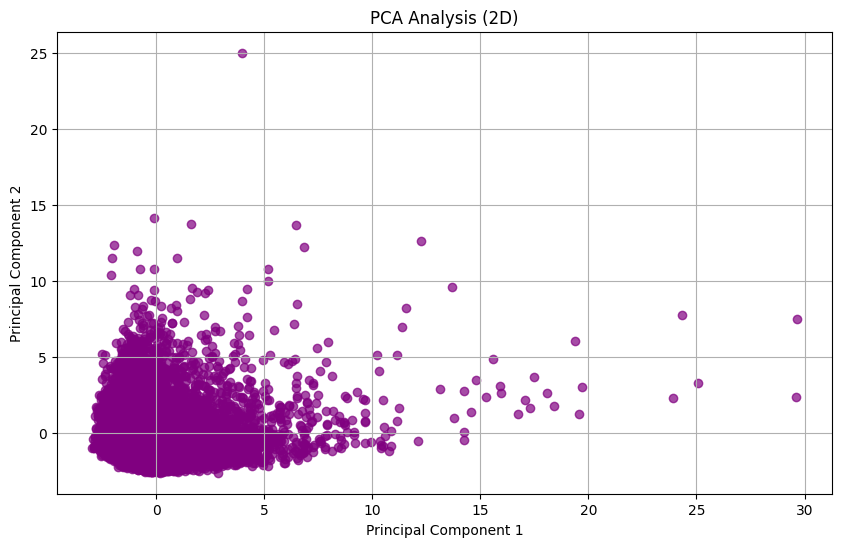

In [8]:
# Function 3: Principal Component Analysis (PCA)
def pca_analysis():
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data_scaled)

    # Explained variance ratio
    explained_variance = pca.explained_variance_ratio_
    print("Explained Variance by Principal Components:", explained_variance)

    plt.figure(figsize=(10, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7, color='purple')
    plt.title('PCA Analysis (2D)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid()
    plt.show()

pca_analysis()

In [9]:
# Function 4: ANOVA (Analysis of Variance) for Payments across different Credit Limit Ranges
def anova_analysis():
    # Create Credit Limit Categories
    bins = [0, 5000, 10000, 15000, 20000, np.inf]
    labels = ['0-5000', '5001-10000', '10001-15000', '15001-20000', '20000+']
    data['Credit_Limit_Category'] = pd.cut(data['CREDIT_LIMIT'], bins=bins, labels=labels)

    groups = [data[data['Credit_Limit_Category'] == label]['PAYMENTS'] for label in labels]

    # Perform ANOVA
    f_stat, p_val = f_oneway(*groups)
    print("ANOVA Test Results:")
    print(f"F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")

    if p_val < 0.05:
        print("There are significant differences between payments across credit limit categories.")
    else:
        print("No significant differences between payments across credit limit categories.")

anova_analysis()

ANOVA Test Results:
F-statistic: 446.56, p-value: 0.0000
There are significant differences between payments across credit limit categories.


EDA

In [10]:
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()

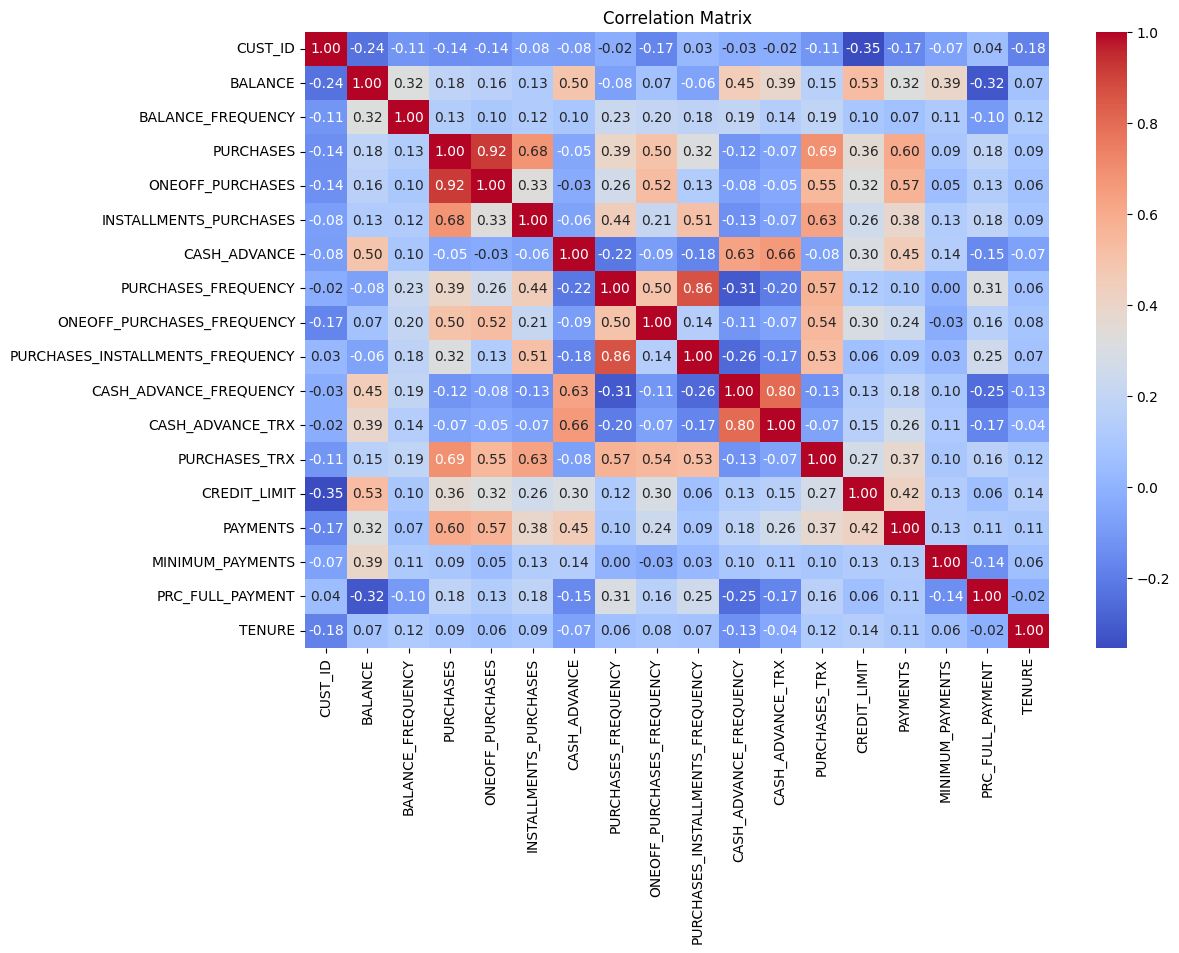

In [11]:
# Function 3: Heatmap (Correlation matrix)
def plot_heatmap():
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

plot_heatmap()


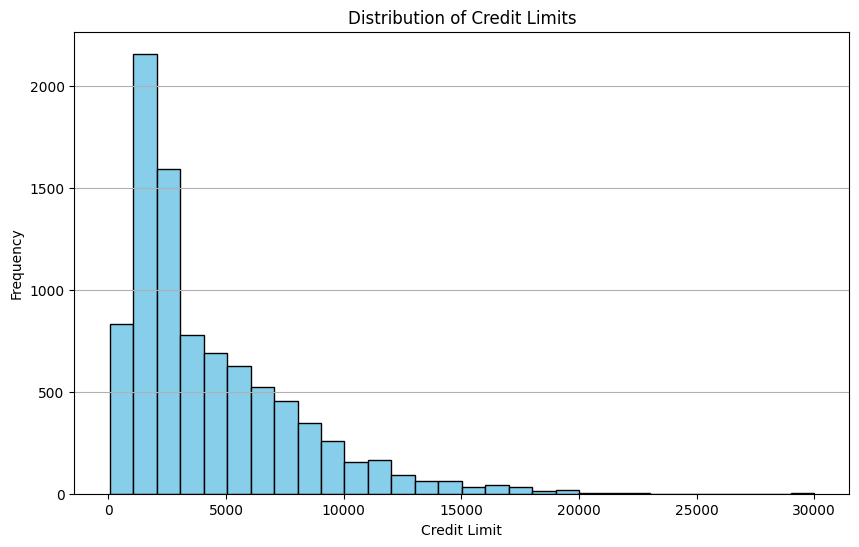

In [12]:
# Function 1: Histogram (Distribution of Credit Limits)
def plot_histogram():
    plt.figure(figsize=(10, 6))
    plt.hist(data['CREDIT_LIMIT'], bins=30, color='skyblue', edgecolor='black')
    plt.title('Distribution of Credit Limits')
    plt.xlabel('Credit Limit')
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()
plot_histogram()


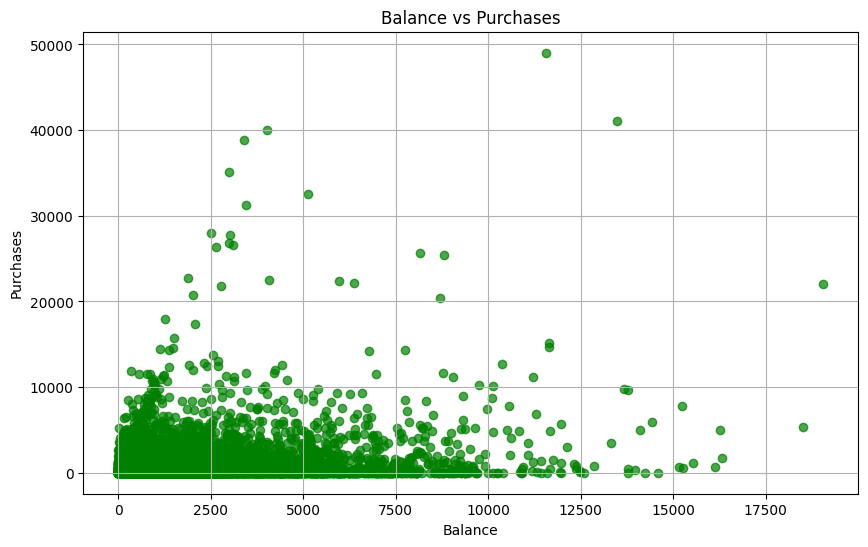

In [13]:
# Function 2: Scatter Plot (Balance vs Purchases)
def plot_scatter():
    plt.figure(figsize=(10, 6))
    plt.scatter(data['BALANCE'], data['PURCHASES'], alpha=0.7, color='green')
    plt.title('Balance vs Purchases')
    plt.xlabel('Balance')
    plt.ylabel('Purchases')
    plt.grid()
    plt.show()

plot_scatter()


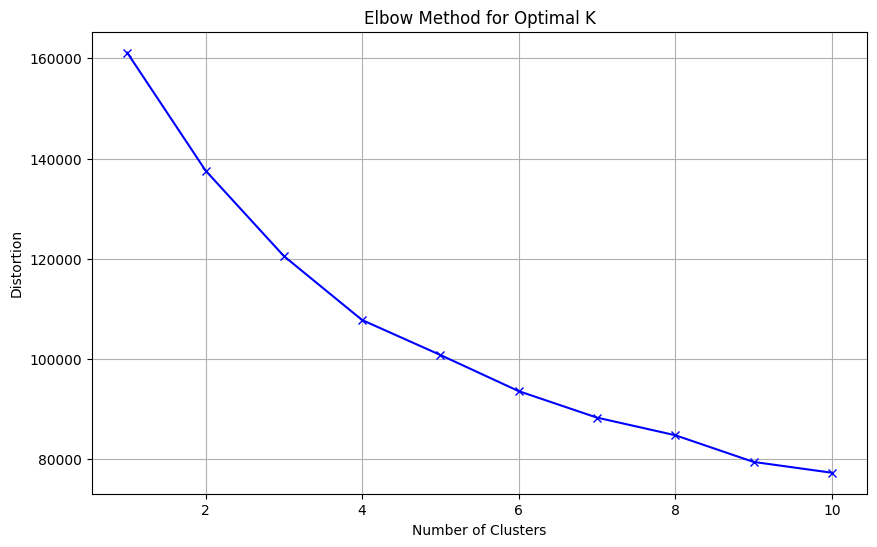

In [14]:
# Function 4: Elbow Plot for K-Means
def plot_elbow():
    distortions = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data_scaled)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(K, distortions, 'bx-')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.grid()
    plt.show()

plot_elbow()


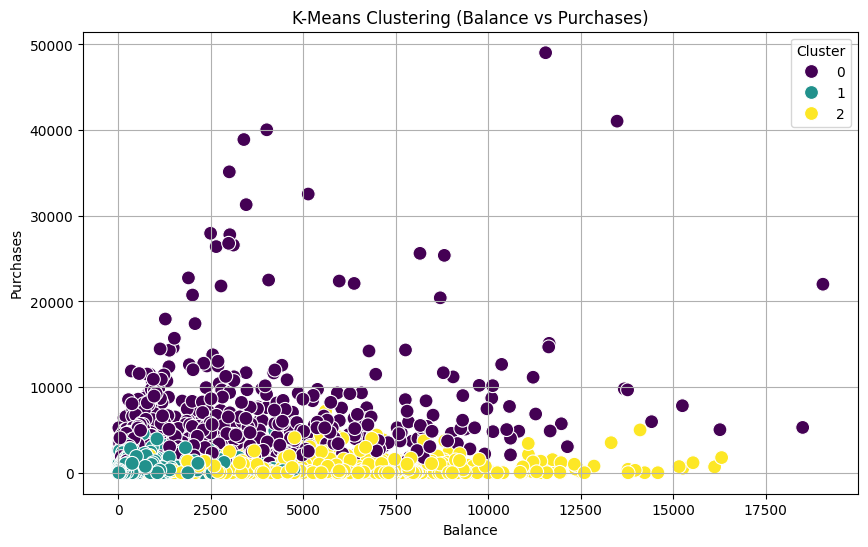

In [15]:
# Function 5: K-Means Clustering and Visualization
def kmeans_clustering():
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(data_scaled)
    data['Cluster'] = clusters

    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=data['BALANCE'], y=data['PURCHASES'], hue=data['Cluster'], palette='viridis', s=100
    )
    plt.title('K-Means Clustering (Balance vs Purchases)')
    plt.xlabel('Balance')
    plt.ylabel('Purchases')
    plt.legend(title='Cluster')
    plt.grid()
    plt.show()
kmeans_clustering()


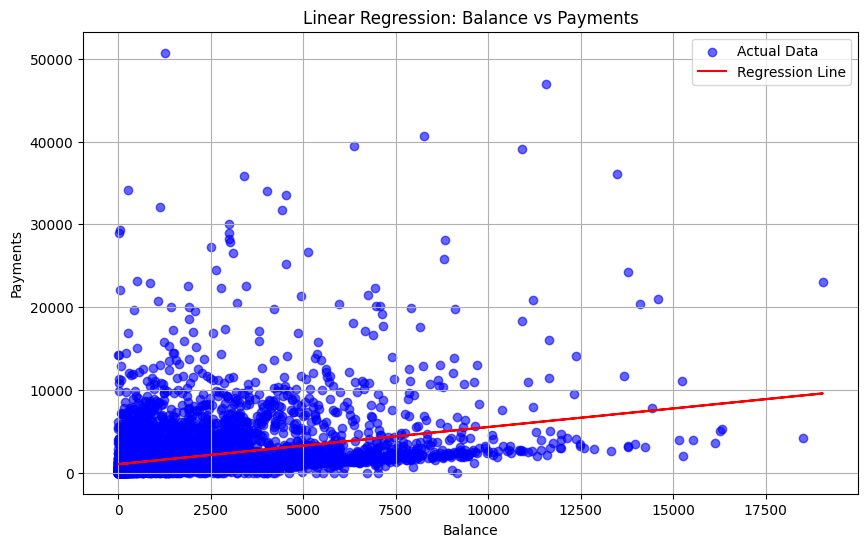

In [16]:
# Function 6: Linear Regression (Balance vs Payments)
def linear_regression():
    X = data[['BALANCE']]
    y = data['PAYMENTS']

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)

    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', alpha=0.6, label='Actual Data')
    plt.plot(X, y_pred, color='red', label='Regression Line')
    plt.title('Linear Regression: Balance vs Payments')
    plt.xlabel('Balance')
    plt.ylabel('Payments')
    plt.legend()
    plt.grid()
    plt.show()

linear_regression()